In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
path = input("Write full path to the sellers file:")
path = path.strip("[]\"'")
sellers = pd.read_csv(path.replace('\\', '/'))
sellers

Write full path to the sellers file:"C:\Users\hromn\TASKS_FOR_SMART_IT\S_Data\sellers.csv"


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [3]:
path = input("Write full path to the order items file:")
path = path.strip("[]\"'")
order_items = pd.read_csv(path.replace('\\', '/'))
order_items

Write full path to the order items file:"C:\Users\hromn\TASKS_FOR_SMART_IT\S_Data\order_items.csv"


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [4]:
path = input("Write full path to the order reviews file:")
path = path.strip("[]\"'")
order_reviews = pd.read_csv(path.replace('\\', '/'))
order_reviews

Write full path to the order reviews file:"C:\Users\hromn\TASKS_FOR_SMART_IT\S_Data\order_reviews.csv"


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


In [5]:
class SentimentClassifier:
    def __init__(self):
        self.vectorizer = TfidfVectorizer(max_features=1000)
        self.model = LogisticRegression(max_iter=10000)

    def train(self, X, y):
        X_vectorized = self.vectorizer.fit_transform(X)
        self.model.fit(X_vectorized, y)

    def predict(self, new_comments):
        new_comments_vectorized = self.vectorizer.transform(new_comments)
        predictions = self.model.predict(new_comments_vectorized)
        return predictions

# Data cleansing from missing values in comments
order_reviews.dropna(subset=['review_comment_message'], inplace=True)

# Convert text to lower case
order_reviews['review_comment_message'] = order_reviews['review_comment_message'].str.lower()

# Target variable coding: 'Positive' for positive feedback (score >= 4), 
# 'Neutal' for neutral comments(score = 3) and 'Negative 'for negative feedback (score < 4)
order_reviews['sentiment'] = order_reviews['review_score'].apply(lambda x: "Positive" if x >= 4 else ("Negative" if x < 3 else "Neutral"))

# Model training
classifier = SentimentClassifier()
classifier.train(order_reviews['review_comment_message'], order_reviews['sentiment'])

# Sentiment prediction for all comments in the table
order_reviews['predicted_sentiment'] = classifier.predict(order_reviews['review_comment_message'])

# Accuracy rate
accuracy = accuracy_score(order_reviews['sentiment'], order_reviews['predicted_sentiment'])
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.86


In [6]:
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,sentiment,predicted_sentiment
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,Positive,Positive
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,parabéns lojas lannister adorei comprar pela i...,2018-03-01 00:00:00,2018-03-02 10:26:53,Positive,Positive
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,Positive,Positive
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"mas um pouco ,travando...pelo valor ta boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22,Positive,Positive
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01,Positive,Positive
...,...,...,...,...,...,...,...,...,...
99983,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,NaN,entregou dentro do prazo. o produto chegou em ...,2018-02-07 00:00:00,2018-02-19 19:47:23,Positive,Positive
99990,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,3,NaN,"o produto não foi enviado com nf, não existe v...",2018-05-19 00:00:00,2018-05-20 21:51:06,Neutral,Negative
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"excelente mochila, entrega super rápida. super...",2018-03-22 00:00:00,2018-03-23 09:10:43,Positive,Positive
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43,Negative,Negative


In [7]:
order_reviews_positive = order_reviews[order_reviews['predicted_sentiment'] == 'Positive']
order_reviews_negative = order_reviews[order_reviews['predicted_sentiment'] == 'Negative']
order_reviews_neutral = order_reviews[order_reviews['predicted_sentiment'] == 'Neutral']

review_score_5_positive = order_reviews_positive[order_reviews_positive['review_score'] == 5]
review_score_5_negative = order_reviews_negative[order_reviews_negative['review_score'] == 5]
review_score_5_neutral = order_reviews_neutral[order_reviews_neutral['review_score'] == 5]

review_score_4_positive = order_reviews_positive[order_reviews_positive['review_score'] == 4]
review_score_4_negative = order_reviews_negative[order_reviews_negative['review_score'] == 4]
review_score_4_neutral = order_reviews_neutral[order_reviews_neutral['review_score'] == 4]

review_score_3_positive = order_reviews_positive[order_reviews_positive['review_score'] == 3]
review_score_3_negative = order_reviews_negative[order_reviews_negative['review_score'] == 3]
review_score_3_neutral = order_reviews_neutral[order_reviews_neutral['review_score'] == 3]

review_score_2_positive = order_reviews_positive[order_reviews_positive['review_score'] == 2]
review_score_2_negative = order_reviews_negative[order_reviews_negative['review_score'] == 2]
review_score_2_neutral = order_reviews_neutral[order_reviews_neutral['review_score'] == 2]

review_score_1_positive = order_reviews_positive[order_reviews_positive['review_score'] == 1]
review_score_1_negative = order_reviews_negative[order_reviews_negative['review_score'] == 1]
review_score_1_neutral = order_reviews_neutral[order_reviews_neutral['review_score'] == 1]

scores = [5, 4, 3, 2, 1]

# Create a list with the number of positive, neutral and negative comments for each score
positive_counts = [len(review_score_5_positive), 
                   len(review_score_4_positive), 
                   len(review_score_3_positive), 
                   len(review_score_2_positive), 
                   len(review_score_1_positive)]

neutral_counts = [len(review_score_5_neutral), 
                  len(review_score_4_neutral), 
                  len(review_score_3_neutral),
                  len(review_score_2_neutral), 
                  len(review_score_1_neutral)]

negative_counts = [len(review_score_5_negative), 
                   len(review_score_4_negative), 
                   len(review_score_3_negative),
                   len(review_score_2_negative), 
                   len(review_score_1_negative)]


score_comments_count = {'Score': scores,
        'Positive': positive_counts,
        'Neutral': neutral_counts,
        'Negative': negative_counts}

score_comments_count = pd.DataFrame(score_comments_count)


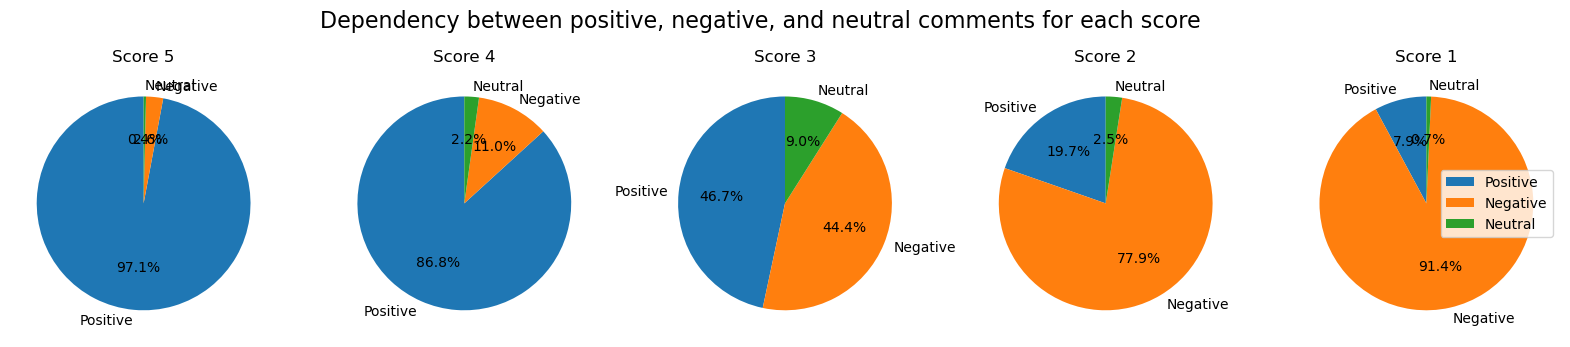

,Score,Positive,Neutral,Negative
0,5,20039,74,533
1,4,5236,133,665
2,3,1710,329,1626
3,2,438,55,1736
4,1,721,65,8393


In [8]:
labels = ['Score 5', 'Score 4', 'Score 3', 'Score 2', 'Score 1']
legend_labels = ['Positive', 'Negative', 'Neutral']

fig, axs = plt.subplots(1, 5, figsize=(20, 4))

# Create a pie for each grade
for item in range(5):
    axs[item].pie([positive_counts[item], 
                   negative_counts[item],
                   neutral_counts[item]], 
                   labels=legend_labels, 
                   autopct='%1.1f%%', 
                   startangle=90)
    
    axs[item].set_title(labels[item])

plt.suptitle('Dependency between positive, negative, and neutral comments for each score', fontsize=16)

plt.legend()
plt.show()

score_comments_count

Products with best and worst reviews

In [9]:
# Merge order_reviews and order_items tables by order_id columns
merged_data = pd.merge(order_reviews, order_items, on='order_id', how='inner')

# Remove unnecessary columns
merged_data = merged_data.loc[:, ['seller_id', 'product_id', 'predicted_sentiment', 'review_score']]

merged_data


,seller_id,product_id,predicted_sentiment,review_score
0,a1043bafd471dff536d0c462352beb48,52c80cedd4e90108bf4fa6a206ef6b03,Positive,5
1,989becdce12ebc39863c2bceab6f3ca1,3880d25d502b15b1de6fddc42ad1d67a,Positive,5
2,05ff92fedb5be47920fea08e501238b9,61a4100ccd6d9c4c808a1fd954ddb8ad,Positive,4
3,db4350fd57ae30082dec7acbaacc17f9,acffe5d7cd56e6b564cf6841486644ff,Positive,4
4,974cf2cb8f4b7add98709c30df02fe10,6871a3c157d6f51697e887f3c3598479,Positive,5
...,...,...,...,...
48587,432c37c9dfba871172ec162e20118b8c,b5e2d4b3fa2f9ecad4c1df951afcc8ce,Positive,5
48588,562fc2f2c2863ab7e79a9e4388a58a14,79da264732f717f10ebf5d102aa6c32a,Negative,3
48589,17ca9b9e9b9ef8fdb529001b49ebb50f,8ba0118a487ec8671aed57e5ef846574,Positive,5
48590,25cf099de44674fde97473224f9d59ab,54caa022e792f1ce31d4a656cecaa802,Negative,1


In [10]:
# Group data by 'product_id' column and count the number of comments of each type of sentiment
product_sentiment_counts = merged_data.groupby(['product_id', 'predicted_sentiment']).size().unstack(fill_value=0)

# Calculate the total number of comments for each product
product_sentiment_counts['Total'] = product_sentiment_counts.sum(axis=1)

# Adding a new column with the difference between the number of positive and negative comments
product_sentiment_counts['PosNeg_Difference'] = product_sentiment_counts['Positive'] - product_sentiment_counts['Negative']

Best products

In [11]:
# Sort products into a "PosNeg_Difference" column to identify the best products
best_products = product_sentiment_counts.sort_values(by='PosNeg_Difference', ascending=False).head()
best_products


predicted_sentiment,Negative,Neutral,Positive,Total,PosNeg_Difference
product_id,,,,,
422879e10f46682990de24d770e7f83d,68,1,161,230,93
389d119b48cf3043d311335e499d9c6b,52,0,143,195,91
99a4788cb24856965c36a24e339b6058,85,1,160,246,75
154e7e31ebfa092203795c972e5804a6,24,1,93,118,69
d1c427060a0f73f6b889a5c7c61f2ac4,40,0,108,148,68


Worst products

In [12]:
# Sort products into a "PosNeg_Difference" column to identify the worst products
worst_products = product_sentiment_counts.sort_values(by='PosNeg_Difference', ascending=True).head()

worst_products

predicted_sentiment,Negative,Neutral,Positive,Total,PosNeg_Difference
product_id,,,,,
36f60d45225e60c7da4558b070ce4b60,52,2,16,70,-36
b1d207586fca400a2370d50a9ba1da98,35,0,4,39,-31
e53e557d5a159f5aa2c5e995dfdf244b,55,1,30,86,-25
362b773250263786dd58670d2df42c3b,32,0,9,41,-23
89b121bee266dcd25688a1ba72eefb61,34,0,12,46,-22


 Sellers who only collect negative feedback

In [13]:
# Group the merged_data DataFrame by 'seller_id' and 'predicted_sentiment', and count the occurrences of each sentiment for each seller.
seller_sentiment_counts = merged_data.groupby(['seller_id', 'predicted_sentiment']).size().unstack(fill_value=0)

# Adding new column for the sum of sentiments for each seller across all sentiments.
seller_sentiment_counts['Total'] = seller_sentiment_counts.sum(axis=1)

# Adding a new column with the difference between the number of positive and negative comments
seller_sentiment_counts['PosNeg_Difference'] = seller_sentiment_counts['Positive'] - seller_sentiment_counts['Negative']

worst_sellers = seller_sentiment_counts.sort_values(by='PosNeg_Difference', ascending=True).head()

worst_sellers

predicted_sentiment,Negative,Neutral,Positive,Total,PosNeg_Difference
seller_id,,,,,
7c67e1448b00f6e969d365cea6b010ab,393,28,299,720,-94
1ca7077d890b907f89be8c954a02686a,86,1,7,94,-79
2eb70248d66e0e3ef83659f71b244378,105,2,29,136,-76
88460e8ebdecbfecb5f9601833981930,100,9,46,155,-54
54965bbe3e4f07ae045b90b0b8541f52,37,1,13,51,-24


Classification of comments

In [ ]:
def predict_sentiment(text):
    preprocessed_text = text.lower()
    
    # Predict sentiment using the trained model
    predicted_sentiment = classifier.predict([preprocessed_text])[0]

    return predicted_sentiment

# Model works with comments in Spanish language, because it was trained by 
# Comments in Spanish as in the data
text_to_predict = input("Write a comment to classify it: ")
predicted_sentiment = predict_sentiment(text_to_predict)
print(f"The predicted sentiment for the text is: {predicted_sentiment}")
